#Problem Statement
Business Context:
High employee turnover is a critical challenge for corporate organizations in Bangladesh, leading to significant financial losses, reduced productivity, and loss of institutional knowledge. Traditional HR methods often fail to identify at-risk employees before they resign.

The project aims to develop a robust Machine Learning System using advanced algorithms (like TabPFN) to predict employee attrition. The prediction is a binary classification problem (Attrition: Yes/No) that analyzes demographic, job-related, and behavioral data.

The core objectives are:

Early Detection: To proactively identify employees who are likely to leave the organization.

Cost Reduction: To minimize the heavy costs associated with hiring and training new staff by retaining existing talent.

Root Cause Analysis: To understand the key factors (such as Low Salary, Overtime, or Lack of Promotion) driving attrition using Explainable AI (XAI).

Data-Driven Decisions: To replace intuition-based HR management with evidence-based retention strategies.

# Import Required Libraries
Import the necessary libraries for data manipulation, visualization, and modeling.

In [17]:


import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report, ConfusionMatrixDisplay


warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print(" Libraries Imported Successfully!")


sns.set(rc={"figure.figsize": (15, 6)})


pd.set_option("display.max_columns", None)

 Libraries Imported Successfully!




About the Dataset
Dataset Description
The dataset used in this research comprises comprehensive human resource records derived from a corporate environment. It is designed to analyze employee behavior and predict the likelihood of attrition. The dataset contains a mix of demographic details, job-related attributes, and financial indicators.

Feature Description
The dataset includes the following key features, categorized by their type:

1. Target Variable:

Attrition: The dependent variable indicating whether an employee has left the organization. (Binary: "Yes" or "No").

2. Demographic Features:

Age: Describes the chronological age of the employee. (Continuous)

Gender: The gender of the employee. (Categorical: Male, Female)

MaritalStatus: The marital status of the employee. (Categorical: Single, Married, Divorced)

DistanceFromHome: The distance between the employee's residence and the office in kilometers. (Continuous)

3. Job & Work-Life Features:

Department: The specific department where the employee works. (Categorical: Sales, Research & Development, Human Resources)

JobRole: The specific role or designation of the employee. (Categorical: Sales Executive, Research Scientist, Manager, etc.)

JobLevel: The hierarchical level of the job within the organization. (Ordinal: 1 to 5)

OverTime: Indicates if the employee works overtime. (Categorical: Yes, No)

BusinessTravel: Frequency of business-related travel. (Categorical: Travel_Rarely, Travel_Frequently, Non-Travel)

4. Financial & Satisfaction Features:

MonthlyIncome: The monthly salary of the employee. (Continuous)

PercentSalaryHike: The percentage increase in salary over the last year. (Continuous)

EnvironmentSatisfaction: Employee's satisfaction with the work environment. (Ordinal: 1-Low to 4-Very High)

JobSatisfaction: Employee's satisfaction with their specific job role. (Ordinal: 1-Low to 4-Very High)

5. Experience & Tenure Features:

TotalWorkingYears: The total number of years the employee has worked across all companies. (Continuous)

YearsAtCompany: The number of years the employee has been with the current organization. (Continuous)

YearsSinceLastPromotion: Number of years since the last promotion. (Continuous)

NumCompaniesWorked: The number of companies the employee worked for before the current one. (Continuous)

# Initial Data Exploration


In [5]:
data = pd.read_csv("data-source/final_augmented_train_data.csv")

In [6]:
data.columns

Index(['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'MaritalStatus',
       'Gender', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'Education',
       'Department', 'OverTime', 'DistanceFromHome', 'Attrition'],
      dtype='object')

In [4]:
data.head(5)

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,MaritalStatus,Gender,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,Education,Department,OverTime,DistanceFromHome,Attrition
0,27.0,50000.0,4.0,4.0,2.0,2.0,Unmarried,Male,5.0,3.0,3.0,3.0,Graduate,Others,No,15.0,No
1,39.0,30000.0,13.0,4.0,4.0,0.0,Married,Male,1.0,1.0,2.0,2.0,Graduate,Sales,Yes,21.0,Yes
2,33.0,15000.0,6.0,4.0,1.0,1.0,Married,Female,3.0,2.0,3.0,2.0,Graduate,Sales,Yes,2.0,Yes
3,51.0,60000.0,18.0,9.5,5.0,5.0,Married,Male,5.0,5.0,5.0,5.0,Post Graduate,IT,No,17.0,No
4,29.0,30000.0,5.0,2.0,2.0,0.0,Married,Female,5.0,4.0,3.0,3.0,Diploma,Medical,No,0.5,No


In [ ]:

print("First few rows of the dataset:")
display(data.head())


print("Shape of the dataset:")
print(data.shape)


print("Column names in the dataset:")
print(data.columns)


print("Data types of each column:")
print(data.dtypes)


print("Information about the dataset:")
print(data.info())

print("Null values in the dataset:")
print(data.isnull().sum())


print("Duplicate values in the dataset:")
print(data.duplicated().sum())

t
data.drop_duplicates(inplace=True)

print("Summary statistics of the dataset:")
print(data.describe())

categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

print("Categorical features:")
print(categorical_features)

print("Numerical features:")
print(numerical_features)

print("Unique values for each categorical feature:")
for feature in categorical_features:
    print(f"{feature}: {data[feature].unique()}")



First few rows of the dataset:


,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,MaritalStatus,Gender,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,Education,Department,OverTime,DistanceFromHome,Attrition
0,27.0,50000.0,4.0,4.0,2.0,2.0,Unmarried,Male,5.0,3.0,3.0,3.0,Graduate,Others,No,15.0,No
1,39.0,30000.0,13.0,4.0,4.0,0.0,Married,Male,1.0,1.0,2.0,2.0,Graduate,Sales,Yes,21.0,Yes
2,33.0,15000.0,6.0,4.0,1.0,1.0,Married,Female,3.0,2.0,3.0,2.0,Graduate,Sales,Yes,2.0,Yes
3,51.0,60000.0,18.0,9.5,5.0,5.0,Married,Male,5.0,5.0,5.0,5.0,Post Graduate,IT,No,17.0,No
4,29.0,30000.0,5.0,2.0,2.0,0.0,Married,Female,5.0,4.0,3.0,3.0,Diploma,Medical,No,0.5,No


Shape of the dataset:
(320, 17)
Column names in the dataset:
Index(['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'MaritalStatus',
       'Gender', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'Education',
       'Department', 'OverTime', 'DistanceFromHome', 'Attrition'],
      dtype='object')
Data types of each column:
Age                         float64
MonthlyIncome               float64
TotalWorkingYears           float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
MaritalStatus                object
Gender                       object
JobSatisfaction             float64
EnvironmentSatisfaction     float64
RelationshipSatisfaction    float64
WorkLifeBalance             float64
Education                    object
Department                   object
OverTime                     object
DistanceFr

# Data Cleaning
Clean the data by handling missing values, removing duplicates, and correcting data types.

In [8]:
data.columns

Index(['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'MaritalStatus',
       'Gender', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'Education',
       'Department', 'OverTime', 'DistanceFromHome', 'Attrition'],
      dtype='object')

In [9]:
import pandas as pd
import os

print(f"Current Working Directory: {os.getcwd()}")

file_path = "data-source/final_augmented_train_data.csv"

if not os.path.exists(file_path):
    file_path = "../data-source/final_augmented_train_data.csv"

if os.path.exists(file_path):
    print(f" File Found at: {file_path}")
    
    aug_df = pd.read_csv(file_path)
    
    real_df = aug_df.iloc[:120].copy()
    synth_df = aug_df.iloc[120:].copy()
    
    real_df['Type'] = 'Real'
    synth_df['Type'] = 'Synthetic'
    
    combined_df = pd.concat([real_df, synth_df], axis=0)
    
    combined_df['Attrition_Num'] = combined_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
    real_df['Attrition_Num'] = real_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
    synth_df['Attrition_Num'] = synth_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    print(f"Data Loaded & Sliced: {len(real_df)} Real, {len(synth_df)} Synthetic rows.")

else:
    print(" Error: File still not found! Check your folder name carefully.")

Current Working Directory: /home/abir-ahmmed/projects/employee-attrition-mlops
 File Found at: data-source/final_augmented_train_data.csv
Data Loaded & Sliced: 120 Real, 200 Synthetic rows.


# Data Visualization
Visualize the data using various plots to understand the distribution of features and relationships between them.

 1. Class Balance Check (Target Distribution)


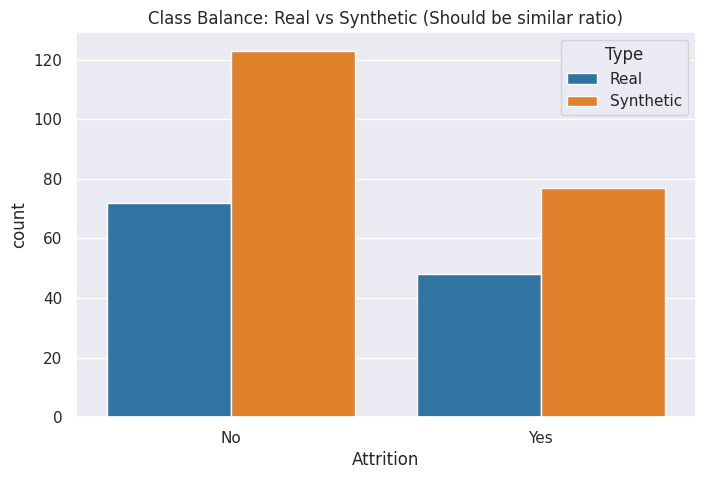

In [11]:
print(" 1. Class Balance Check (Target Distribution)")
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', hue='Type', data=combined_df, palette={'Real': '#1f77b4', 'Synthetic': '#ff7f0e'})
plt.title("Class Balance: Real vs Synthetic (Should be similar ratio)")
plt.show()

 2. Logical Constraint Validation


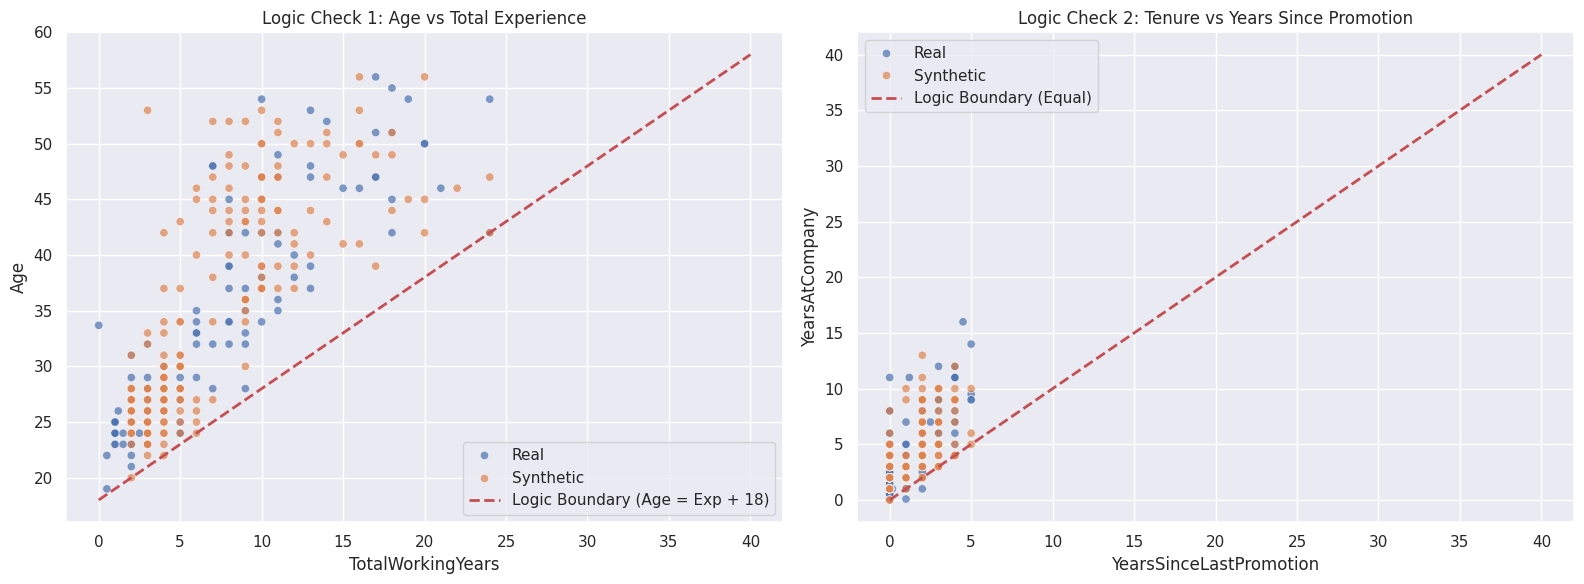

In [18]:
print(" 2. Logical Constraint Validation")
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x='TotalWorkingYears', y='Age', hue='Type', data=combined_df, ax=ax[0], alpha=0.7)
x_vals = np.linspace(0, 40, 100)
ax[0].plot(x_vals, x_vals + 18, 'r--', linewidth=2, label='Logic Boundary (Age = Exp + 18)')
ax[0].set_title('Logic Check 1: Age vs Total Experience')
ax[0].legend()

sns.scatterplot(x='YearsSinceLastPromotion', y='YearsAtCompany', hue='Type', data=combined_df, ax=ax[1], alpha=0.7)
ax[1].plot([0, 40], [0, 40], 'r--', linewidth=2, label='Logic Boundary (Equal)')
ax[1].set_title('Logic Check 2: Tenure vs Years Since Promotion')
ax[1].legend()

plt.tight_layout()
plt.show()

In [19]:
print(" 3. Statistical Fidelity Check (KS Test)")
numerical_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome']

print(f"{'Feature':<25} | {'p-value':<10} | {'Result'}")
print("-" * 55)

passed_count = 0
for col in numerical_cols:
    stat, p_val = ks_2samp(real_df[col], synth_df[col])
    res = " Pass" if p_val > 0.05 else " Fail (Dist. Differs)"
    if p_val > 0.05: passed_count += 1
    print(f"{col:<25} | {p_val:.4f}     | {res}")

print(f"\n Total Features Passed KS Test: {passed_count}/{len(numerical_cols)}")

 3. Statistical Fidelity Check (KS Test)
Feature                   | p-value    | Result
-------------------------------------------------------
Age                       | 0.3393     |  Pass
MonthlyIncome             | 0.0577     |  Pass
TotalWorkingYears         | 0.1282     |  Pass
YearsAtCompany            | 0.2565     |  Pass
DistanceFromHome          | 0.1042     |  Pass

 Total Features Passed KS Test: 5/5


 4. Feature Interactions (Pairplot)


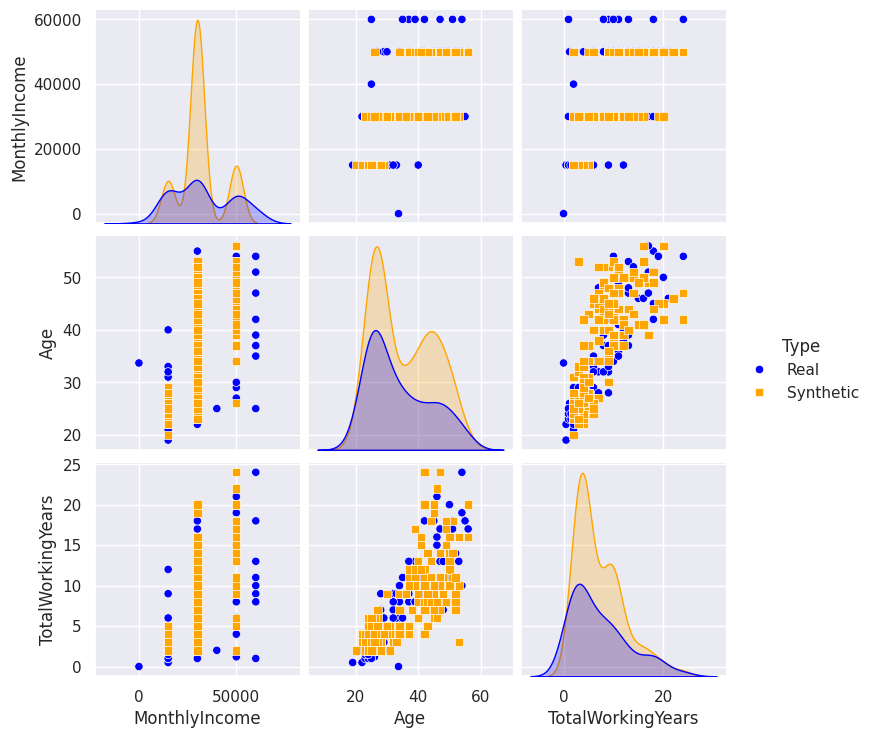

In [20]:
print(" 4. Feature Interactions (Pairplot)")
imp_cols = ['MonthlyIncome', 'Age', 'TotalWorkingYears', 'Attrition', 'Type']

import warnings
warnings.filterwarnings('ignore')

sns.pairplot(combined_df[imp_cols], hue='Type', diag_kind='kde', palette={'Real': 'blue', 'Synthetic': 'orange'}, markers=["o", "s"])
plt.show()

 5. High-Dimensional Overlap (PCA)
 Features being used for PCA: ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome']


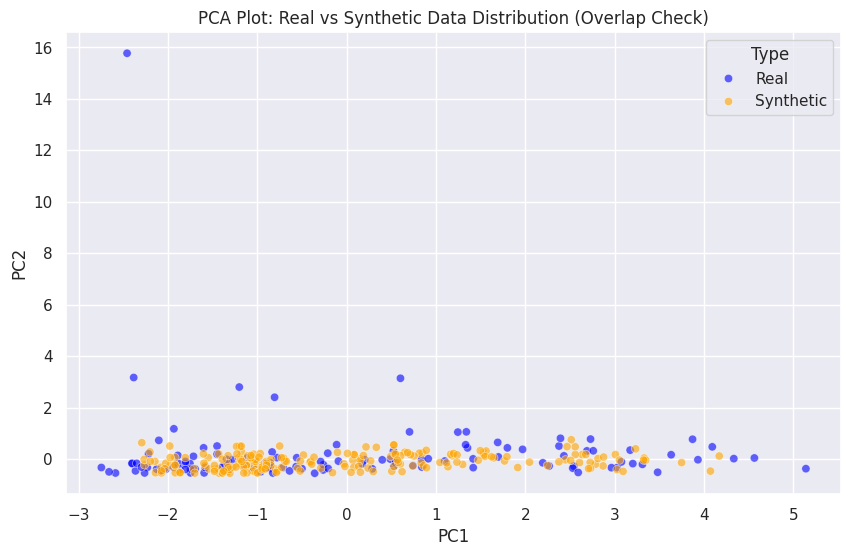


 Research-Grade EDA Complete!


In [21]:
print(" 5. High-Dimensional Overlap (PCA)")


potential_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome', 'NumCompaniesWorked']


features_for_pca = [col for col in potential_features if col in combined_df.columns]

print(f" Features being used for PCA: {features_for_pca}")

if len(features_for_pca) < 2:
    print(" Error: Not enough features found for PCA!")
else:
   
    x = combined_df[features_for_pca].fillna(combined_df[features_for_pca].mean()).values
    x = StandardScaler().fit_transform(x)

   
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    
    pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
    pca_df['Type'] = combined_df['Type'].values

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='PC1', y='PC2', 
        hue='Type', 
        data=pca_df, 
        alpha=0.6, 
        palette={'Real':'blue', 'Synthetic':'orange'}
    )
    plt.title('PCA Plot: Real vs Synthetic Data Distribution (Overlap Check)')
    plt.show()

print("\n Research-Grade EDA Complete!")

# Feature Engineering
Perform feature engineering, including encoding categorical variables and scaling numerical features.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# ১. শুধু সংখ্যার কলামগুলো নিন (Category বাদ দিয়ে)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# ২. ছবির সাইজ ঠিক করা
plt.figure(figsize=(10, 8))

# ৩. হিটম্যাপ তৈরি করা
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')

# ৪. ছবি সেভ করা
plt.savefig("correlation_heatmap.png")
plt.show()

NameError: name 'df' is not defined

# Correlation Analysis
Analyze the correlation between features and the target variable using a heatmap.

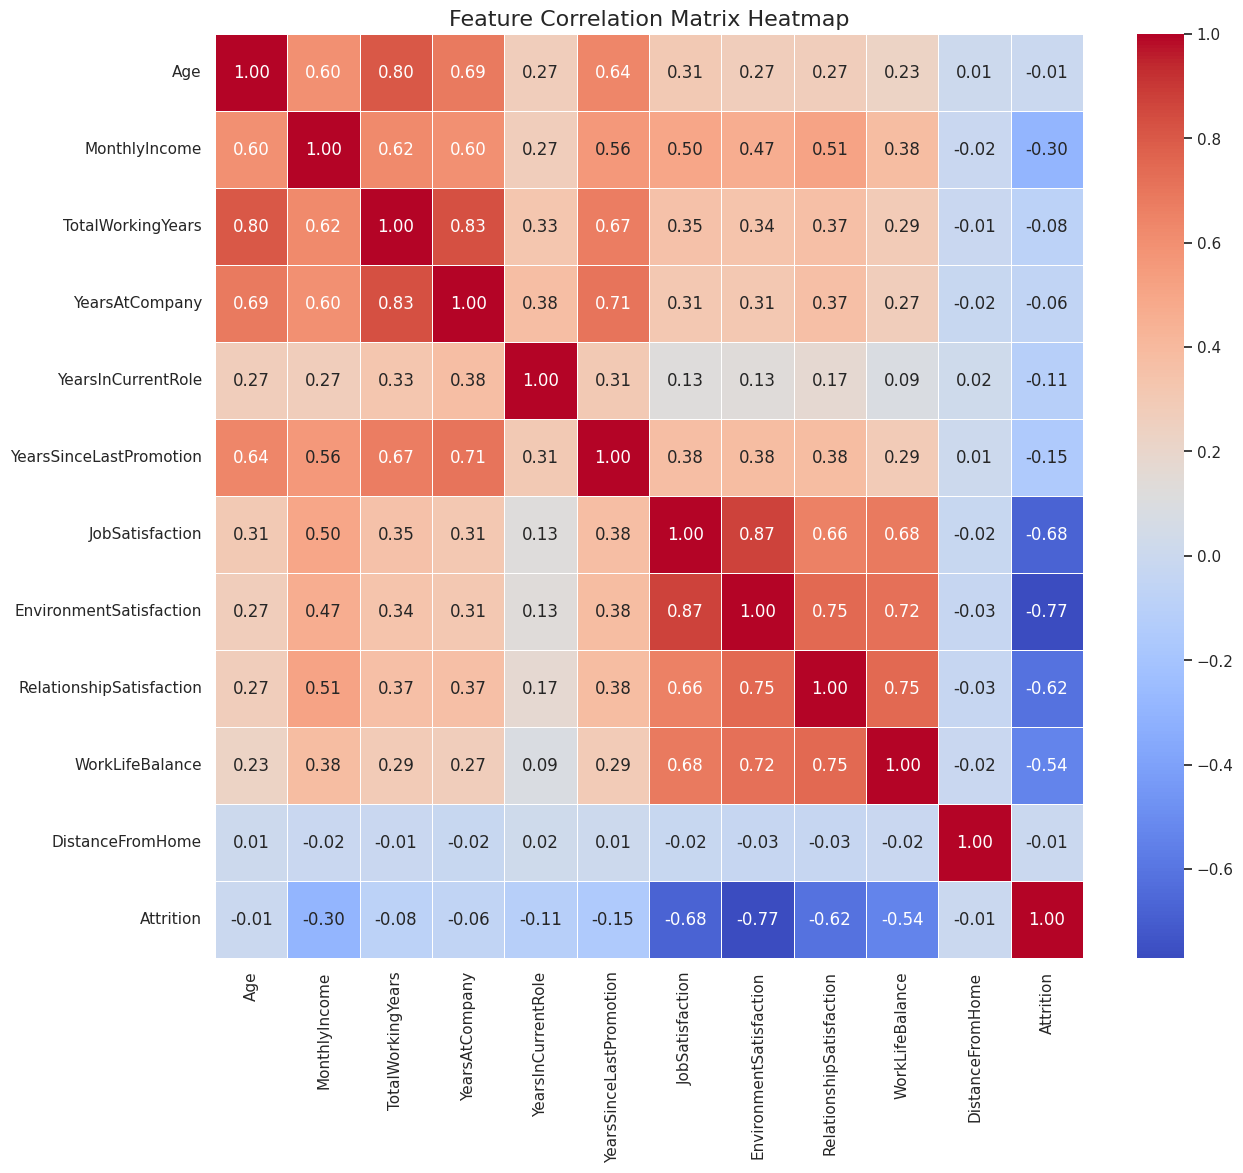

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ১. যদি 'Attrition' কলাম থাকে এবং সেটি 'Yes/No' হয়, তবে সেটাকে ১/০ করে নিচ্ছি
# এতে হিটম্যাপে দেখা যাবে কোন ফিচারের কারণে এমপ্লয়ি চাকরি ছাড়ছে
if 'Attrition' in data.columns and data['Attrition'].dtype == 'object':
    data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# ২. শুধু সংখ্যার কলামগুলো সিলেক্ট করা
numeric_data = data.select_dtypes(include=[np.number])

# ৩. ছবির সাইজ ঠিক করা
plt.figure(figsize=(14, 12))

# ৪. হিটম্যাপ তৈরি করা
# cmap='coolwarm' দিলে পজিটিভ সম্পর্ক লাল এবং নেগেটিভ সম্পর্ক নীল দেখাবে
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# ৫. টাইটেল এবং সেভ
plt.title('Feature Correlation Matrix Heatmap', fontsize=16)
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')

# ৬. দেখানো
plt.show()

# Model Training
Train machine learning models using the processed data.

In [ ]:
# Model Training
# Train machine learning models using the processed data.

# Separate dependent and independent features
X = data.drop("income", axis=1)
y = data["income"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the shapes of the train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Import necessary libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Define a function to display performance metrics
def performance_metrics(test, predict):
    print(f"CONFUSION_MATRIX: \n{confusion_matrix(test, predict)}")
    print(f"PRECISION_SCORE: {precision_score(test, predict)}")
    print(f"RECALL_SCORE: {recall_score(test, predict)}")
    print(f"F1_SCORE: {f1_score(test, predict)}")
    print(f"ACCURACY_SCORE: {accuracy_score(test, predict)}")

# Logistic Regression
lr = LogisticRegression()
param_grid_lr = {
    "class_weight": ["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=3)
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
y_pred_lr = grid_lr.predict(X_test)
performance_metrics(y_test, y_pred_lr)

# Decision Tree Classifier
dt = DecisionTreeClassifier()
param_grid_dt = {
    "class_weight": ["balanced"],
    "criterion": ['gini', "entropy"],
    "splitter": ['best', 'random'],
    "max_depth": [3, 4, 5, 6],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["auto", "sqrt", "log2"]
}
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring="accuracy")
grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
y_pred_dt = grid_dt.predict(X_test)
performance_metrics(y_test, y_pred_dt)

# Random Forest Classifier
rf = RandomForestClassifier()
param_grid_rf = {
    "class_weight": ["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring="accuracy")
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_test)
performance_metrics(y_test, y_pred_rf)

# Display classification report for the best model
print("Classification Report for the Best Model (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Model Evaluation
Evaluate the performance of the trained models using various metrics.

In [ ]:
# Model Evaluation
# Evaluate the performance of the trained models using various metrics.

# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
performance_metrics(y_test, y_pred_lr)

# Evaluate Decision Tree model
print("Decision Tree Model Evaluation:")
performance_metrics(y_test, y_pred_dt)

# Evaluate Random Forest model
print("Random Forest Model Evaluation:")
performance_metrics(y_test, y_pred_rf)

# Display classification report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Display classification report for Decision Tree
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Display classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix for the best model (Random Forest)
ConfusionMatrixDisplay.from_estimator(grid_rf, X_test, y_test)
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Hyperparameter Tuning
Perform hyperparameter tuning to optimize the model performance.

In [ ]:
# Hyperparameter Tuning
# Perform hyperparameter tuning to optimize the model performance.

# Logistic Regression
lr = LogisticRegression()
param_grid_lr = {
    "class_weight": ["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=3)
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
y_pred_lr = grid_lr.predict(X_test)
performance_metrics(y_test, y_pred_lr)

# Decision Tree Classifier
dt = DecisionTreeClassifier()
param_grid_dt = {
    "class_weight": ["balanced"],
    "criterion": ['gini', "entropy"],
    "splitter": ['best', 'random'],
    "max_depth": [3, 4, 5, 6],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["auto", "sqrt", "log2"]
}
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring="accuracy")
grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
y_pred_dt = grid_dt.predict(X_test)
performance_metrics(y_test, y_pred_dt)

# Random Forest Classifier
rf = RandomForestClassifier()
param_grid_rf = {
    "class_weight": ["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring="accuracy")
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_test)
performance_metrics(y_test, y_pred_rf)

# Display classification report for the best model
print("Classification Report for the Best Model (Random Forest):")
print(classification_report(y_test, y_pred_rf))